## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization
from keras.regularizers import l1,l2,l1_l2
from keras.layers import Dropout
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128,64],drop_ratio=0.2,l1_ratio=1e-4):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i ,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Dropout(drop_ratio)(x)
            
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [18]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
BATCH_SIZE = 256
EPOCHS = 25
MOMENTUM = 0.95
Dropout_EXP = 0.15
L1_EXP = [1e-2, 1e-4]

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    
    model = build_mlp(input_shape=x_train.shape[1:],drop_ratio=Dropout_EXP,l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
__________

Epoch 3/25
50000/50000 [==============================] - 71s 1ms/step - loss: 2.7827 - acc: 0.4014 - val_loss: 3.0536 - val_acc: 0.2614
Epoch 4/25
50000/50000 [==============================] - 64s 1ms/step - loss: 2.5466 - acc: 0.4116 - val_loss: 3.0824 - val_acc: 0.2045
Epoch 5/25
50000/50000 [==============================] - 63s 1ms/step - loss: 2.4515 - acc: 0.4174 - val_loss: 3.3226 - val_acc: 0.2002
Epoch 6/25
50000/50000 [==============================] - 63s 1ms/step - loss: 2.3500 - acc: 0.4293 - val_loss: 3.0074 - val_acc: 0.1839
Epoch 7/25
50000/50000 [==============================] - 65s 1ms/step - loss: 2.2671 - acc: 0.4248 - val_loss: 2.6149 - val_acc: 0.2998
Epoch 8/25
50000/50000 [==============================] - 63s 1ms/step - loss: 2.2093 - acc: 0.4331 - val_loss: 2.9882 - val_acc: 0.1769
Epoch 9/25
50000/50000 [==============================] - 63s 1ms/step - loss: 2.1641 - acc: 0.4381 - val_loss: 2.6938 - val_acc: 0.2463
Epoch 10/25
50000/50000 [================

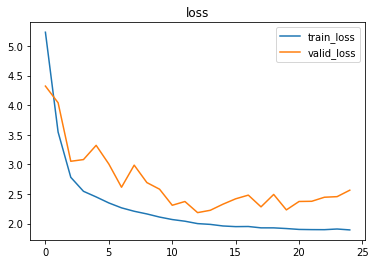

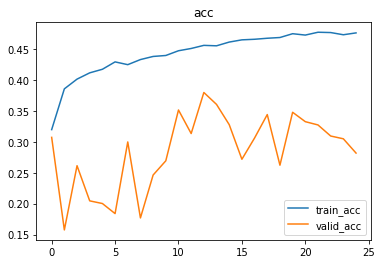

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)),train_loss,label='train_loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid_loss')
plt.legend()
plt.title('loss')
plt.show()


plt.plot(range(len(train_acc)),train_acc,label='train_acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid_acc')
plt.legend()
plt.title('acc')
plt.show()